In [198]:
%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import copy
import os

In [199]:
data = np.random.rand(100, 2);
k = 3; # number_of_clusters

In [200]:
# ------------ Compute all the costs ------------

def manhattan_distance(p1, p2):
    return sum(abs(p1 - p2))

def distance_map(data, medoid):
    return np.apply_along_axis(manhattan_distance, 1, data, medoid)

def compute_distances(data, medoids):
    distances = [distance_map(data, medoid) for medoid in medoids]    
    return np.array(distances);

# ------------ Find index where distance is min ------------

def find_min_index(values):
    x, i = min((x, i) for (i, x) in enumerate(values))
    return i;

def compute_indexes(distances):
    indexes = np.zeros((len(data)));
    for i in range(0, len(data)):
        indexes[i] = find_min_index(distances[:,i]);
    return indexes;

# ------------ Compute total cost (convergence parameter) ------------

def compute_total_cost(distances, indexes):
    total_cost = 0;
    for i in range(0, len(data)):
        total_cost += distances[indexes[i], i];
    return total_cost;

# ------------ Group together cluster data ------------

def gather_cluster(cluster, indexes):
    equals = lambda i : indexes[i] == cluster;
    filtered_indexes = filter(equals, range(0, len(data)));
    return data[filtered_indexes];

def gather_clusters(indexes):
    return [gather_cluster(i, indexes) for i in range(0, k)];

# --------------- Medoid generator ------------------

def generate_new_medoid(medoids, clusters):
    C = rand.randint(0, k-1); # choose random cluster
    
    if len(clusters[C]) == 0:
        # ??
        return;
    
    if len(clusters[C]) == 1: 
        medoids[C] = clusters[C][0];
        
    else:
        I = rand.randint(0, len(clusters[C])-1); 
        medoids[C] = clusters[C][I];

Iter: 0 > Current cost: 43.054875162
Iter: 1 > Better cost found: 38.4821780238
Iter: 2 > Better cost found: 37.7517888527
Iter: 3 > Better cost found: 34.4046569683
Iter: 7 > Better cost found: 33.829865795
Iter: 8 > Better cost found: 33.1868708658
Iter: 9 > Better cost found: 31.6758882713
Iter: 19 > Better cost found: 29.3922028313
Iter: 44 > Better cost found: 29.1441334891
Iter: 49 > Better cost found: 29.0104079883
Iter: 51 > Better cost found: 28.9185124154
Iter: 56 > Better cost found: 28.668057298
Iter: 160 > Better cost found: 28.5091480301
Iter: 171 > Better cost found: 28.3644611662
Iter: 253 > Better cost found: 28.1943794215


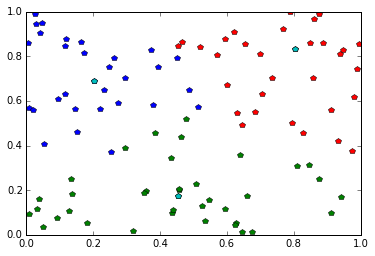

In [201]:
max_iter = 2000;

# First Iteration

old_medoids = rand.sample(data, k); # first K medoids are random
distances = compute_distances(data, old_medoids); # compute distance beetween points and medoids
indexes = compute_indexes(distances); # find indexes where the distance is minimized
clusters = gather_clusters(indexes); # use indexes to group up the cluster data
old_cost = compute_total_cost(distances, indexes); # calculate first cost

print 'Iter: 0 > Current cost: {0}'.format(old_cost);

# Algorithm Loop

for iteration in range(1, max_iter):
    new_medoids = copy.copy(old_medoids); 
    generate_new_medoid(new_medoids, clusters); # generate new medoid
    
    distances = compute_distances(data, new_medoids); # compute distance beetween points and medoids
    indexes = compute_indexes(distances); # find indexes where the distance is minimized
    clusters = gather_clusters(indexes); # use indexes to group up the cluster data
    new_cost = compute_total_cost(distances, indexes); # calculate first cost
    
    if new_cost < old_cost:
        print 'Iter: {0} > Better cost found: {1}'.format(iteration, new_cost);
        old_cost = new_cost;
        old_medoids = new_medoids;

# Recalculate the best setup and plot it

distances = compute_distances(data, old_medoids); # compute distance beetween points and medoids
indexes = compute_indexes(distances); # find indexes where the distance is minimized
clusters = gather_clusters(indexes); # use indexes to group up the cluster data

for cluster in clusters:
    plt.plot(cluster[:,0], cluster[:,1], 'p');
medoids = np.array(old_medoids);
plt.plot(medoids[:,0], medoids[:,1], 'pc');